Воробьев Андрей Павлович, 465440, J3111

In [37]:
import numpy as np
import matplotlib.pyplot as plt

Анализируемая функция:
$$f(x) = \sqrt{e^x} + 4x$$
на отрезке $[a, b] = [0, 2]$.

Также был выбран другой промежуток $[0, 10]$ для тестирования, так как на нём функция принимает более сложный вид.

In [38]:
def f(x):
    return np.sqrt(np.exp(x)) + 4 * x


a_test = 0
b_test = 10
a = 0
b = 2
n_list = [4, 8, 16, 1000]

Графики функции.

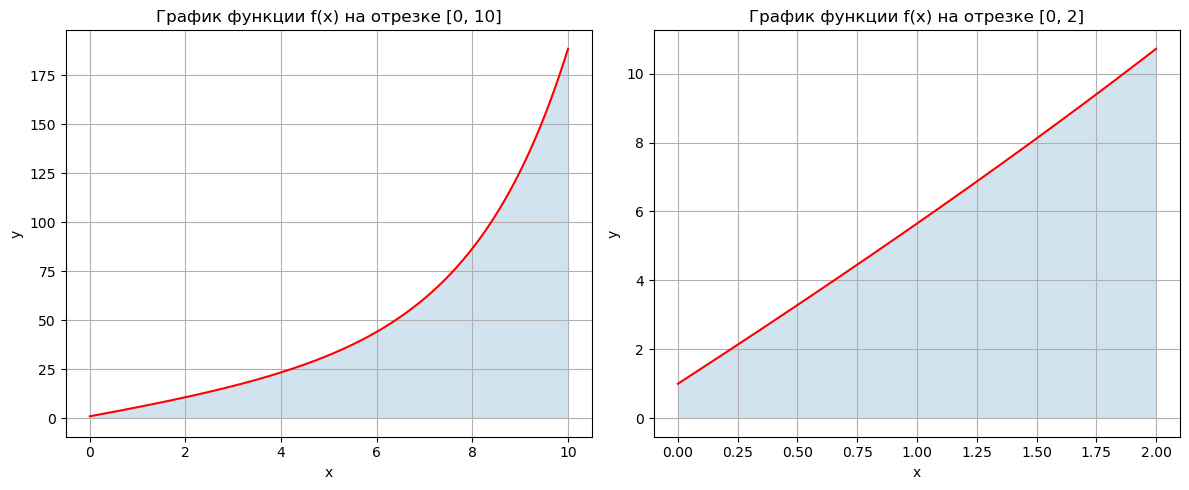

In [6]:
plt.figure(figsize=(12, 5))

x_test = np.linspace(a_test, b_test, 1000)
plt.subplot(1, 2, 1)
plt.plot(x_test, f(x_test), 'r-')
plt.fill_between(x_test, f(x_test), alpha=0.2)
plt.title(f"График функции f(x) на отрезке [{a_test}, {b_test}]")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

x = np.linspace(a, b, 1000)
plt.subplot(1, 2, 2)
plt.plot(x, f(x), 'r-')
plt.fill_between(x, f(x), alpha=0.2)
plt.title(f"График функции f(x) на отрезке [{a}, {b}]")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

plt.tight_layout()

Точное значение интеграла на отрезке

In [7]:
true_value = 2 * np.e + 6
print("Точное значение интеграла на отрезке [0, 2] =", true_value)

true_value_0_10 = 2 * np.exp(5) + 198
print("Точное значение интеграла на отрезке [0, 10] =", true_value_0_10)

Точное значение интеграла на отрезке [0, 2] = 11.43656365691809
Точное значение интеграла на отрезке [0, 10] = 494.8263182051532


Функция для получения разбиения отрезка [a, b] на n равных отрезков, с выбором способа. Также приведены графики разбиений для различных типов.

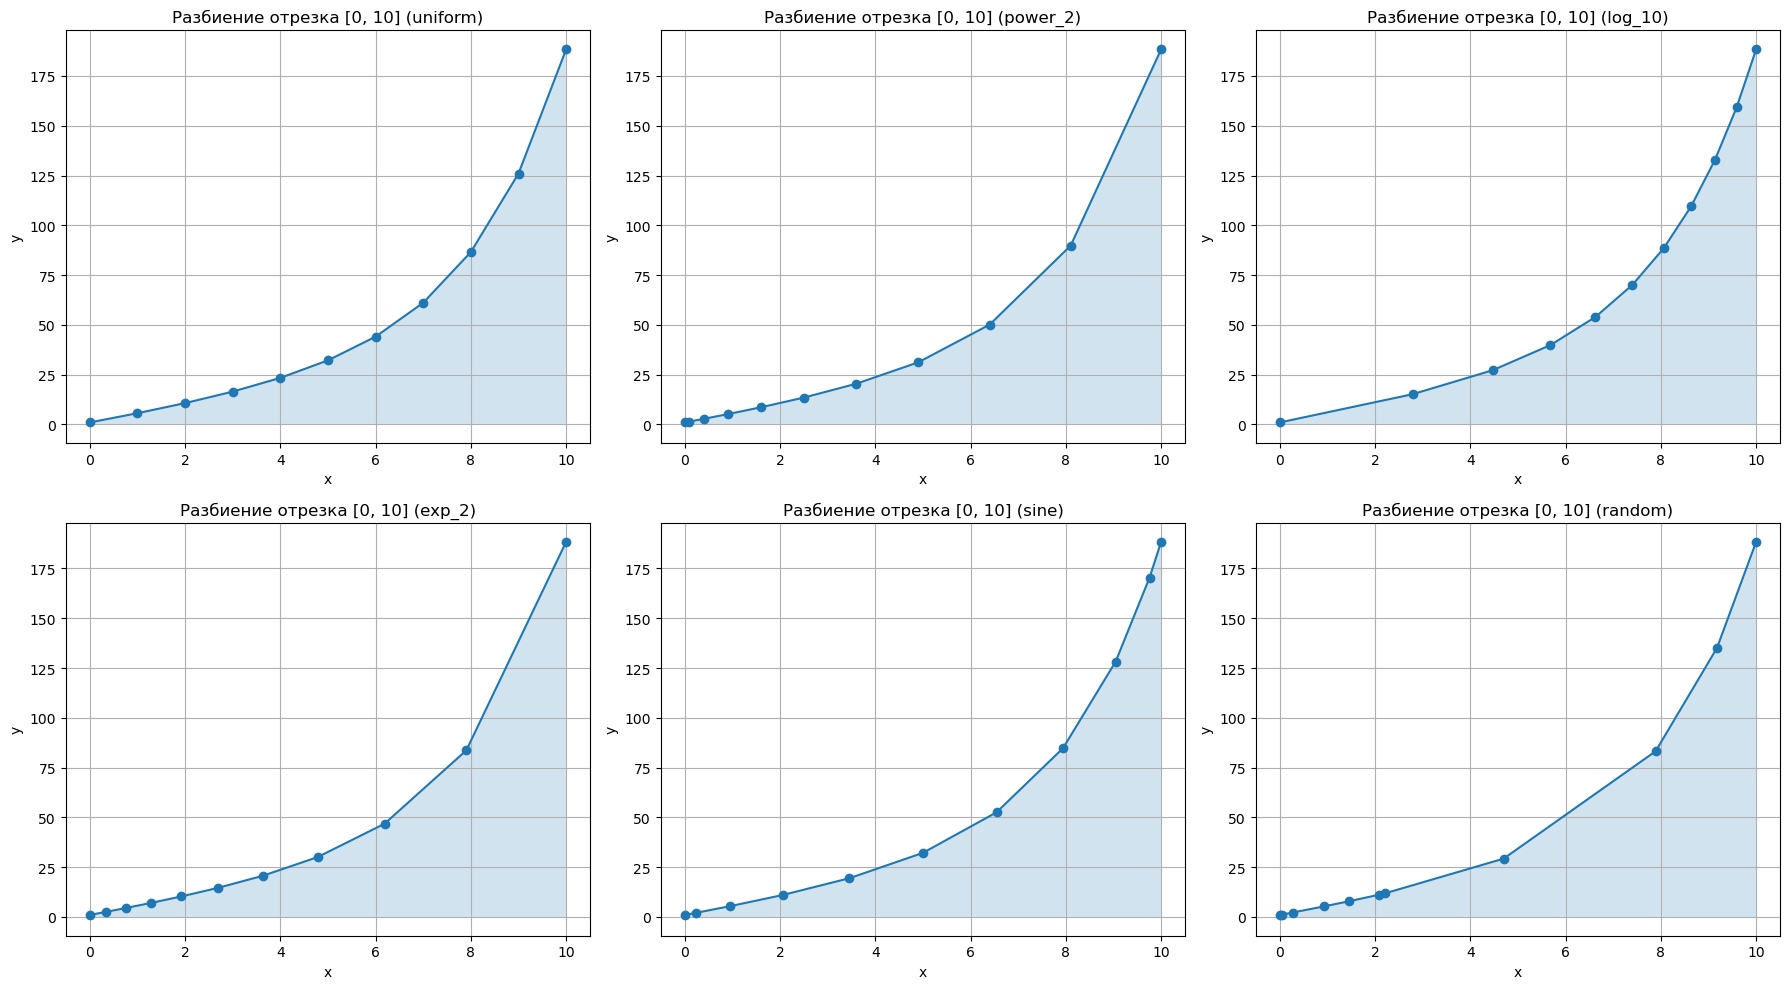

In [8]:
def get_partition(a, b, n=10, type='uniform', **kwargs):
    """
    Функция для получения разбиения отрезка [a, b] на n равных отрезков
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n: Размер разбиения
    :param type: Тип разбиения:
        uniform (равномерное),
        power (степенное),
        log (логарифмическое),
        exp (экспоненциальное),
        sine (синусоидальное),
        random (случайное)
    :param kwargs: Дополнительные параметры для разбиения:
        alpha (для power),
        rate (для exp),
        base (для log)
    :return: Массив точек разбиения длиной n + 1
    """
    t = np.linspace(0, 1, n + 1)

    if type == "uniform":
        x = t
    elif type == "power":
        alpha = kwargs.get("alpha", 2.0)
        x = t ** alpha
    elif type == "log":
        base = kwargs.get("base", 10)
        log_t = np.linspace(1, base, n + 1)
        x = np.log(log_t) / np.log(base)
    elif type == "exp":
        rate = kwargs.get("rate", 2.0)
        x = (np.exp(rate * t) - 1) / (np.exp(rate) - 1)
    elif type == "sine":
        x = (1 - np.cos(np.pi * t)) / 2
    elif type == "random":
        x = np.sort(np.random.rand(n - 1))
        x = np.concatenate([[0], x, [1]])

    return a + (b - a) * x


partitions = {
    "uniform": get_partition(a_test, b_test, type="uniform"),
    "power_2": get_partition(a_test, b_test, type="power", alpha=2),
    "log_10": get_partition(a_test, b_test, type="log", base=10),
    "exp_2": get_partition(a_test, b_test, type="exp", rate=2),
    "sine": get_partition(a_test, b_test, type="sine"),
    "random": get_partition(a_test, b_test, type="random"),
}

plt.figure(figsize=(18, 10))
for i, (name, x) in enumerate(partitions.items()):
    plt.subplot(2, 3, i + 1)
    plt.plot(x, f(x), 'o-')
    plt.fill_between(x, f(x), alpha=0.2)
    plt.title(f"Разбиение отрезка [{a_test}, {b_test}] ({name})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
plt.tight_layout()
plt.show()

Приведём методы интегрирования:
- Метод левых прямоугольников
- Метод правых прямоугольников
- Метод средних прямоугольников
- Метод трапеций
- Метод Симпсона.

Для каждого разбиения выведем его графически и вычислим приближенное значение интеграла.

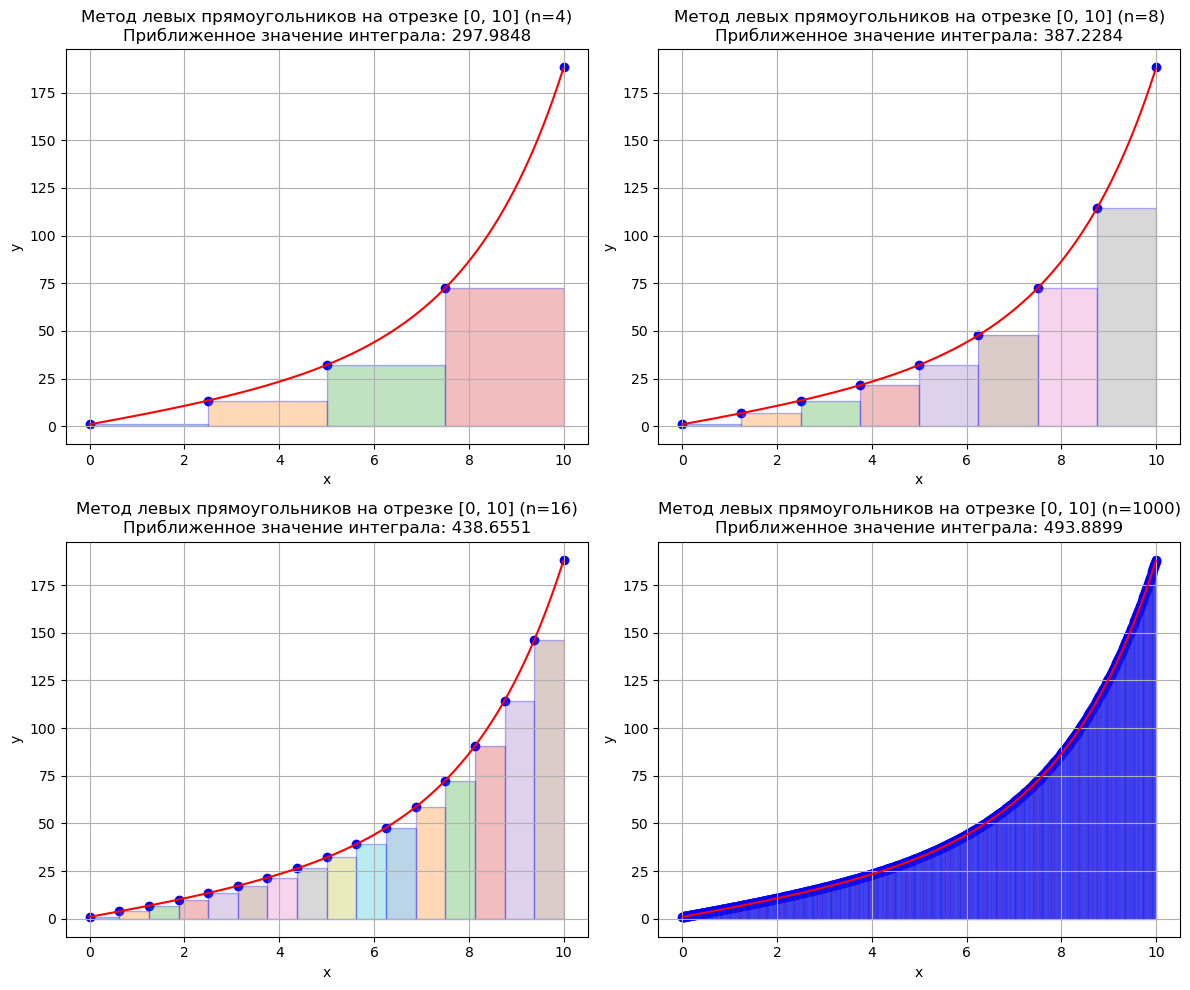

In [9]:
def integral_left_rectangle(f, a, b, n_list, plot=False, **kwargs):
    """
    Метод левых прямоугольников
    :param f: Функция
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n_list: Список размеров разбиений
    :param plot: Флаг для построения графика
    :param kwargs: Дополнительные параметры для разбиения
    :return: Список приближённых значений интеграла для каждого n
    """
    result = []
    if plot:
        plt.figure(figsize=(12, 10))

    for n in n_list:
        x = get_partition(a, b, n, **kwargs)
        integral = 0
        for i in range(n):
            integral += f(x[i]) * (x[i + 1] - x[i])
        result.append(integral)

        if plot:
            plt.subplot(2, 2, n_list.index(n) + 1)
            plt.plot(np.arange(a, b, 0.01), f(np.arange(a, b, 0.01)), 'r-')
            plt.scatter(x, f(x), color='b')
            for i in range(n):
                x_left = x[i]
                x_right = x[i + 1]
                y_val = f(x_left)
                X_rect = [x_left, x_right, x_right, x_left, x_left]
                Y_rect = [0, 0, y_val, y_val, 0]
                plt.fill(X_rect, Y_rect, alpha=0.3, edgecolor='b')
            plt.title(f"Метод левых прямоугольников на отрезке [{a}, {b}] (n={n})\n"
                      f"Приближенное значение интеграла: {integral:.4f}")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.grid()

    if plot:
        plt.tight_layout()
        plt.show()
    return result


result_left_test = integral_left_rectangle(f, a_test, b_test, n_list, plot=True)

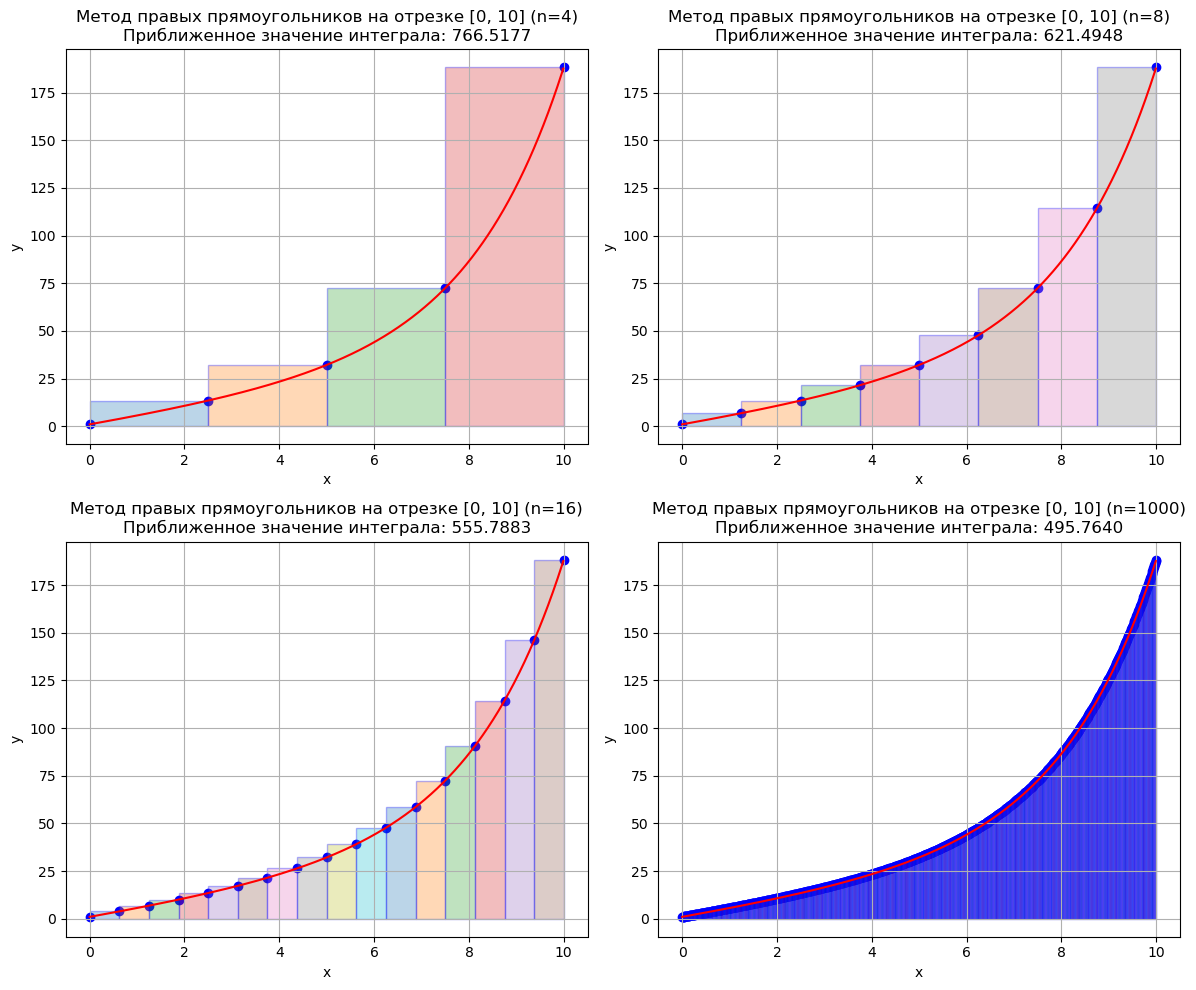

In [10]:
def integral_right_rectangle(f, a, b, n_list, plot=False, **kwargs):
    """
    Метод правых прямоугольников
    :param f: Функция
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n_list: Список размеров разбиений
    :param plot: Флаг для построения графика
    :param kwargs: Дополнительные параметры для разбиения
    :return: Список приближённых значений интеграла для каждого n
    """
    result = []
    if plot:
        plt.figure(figsize=(12, 10))

    for n in n_list:
        x = get_partition(a, b, n, **kwargs)
        integral = 0
        for i in range(n):
            integral += f(x[i + 1]) * (x[i + 1] - x[i])
        result.append(integral)

        if plot:
            plt.subplot(2, 2, n_list.index(n) + 1)
            plt.plot(np.arange(a, b, 0.01), f(np.arange(a, b, 0.01)), 'r-')
            plt.scatter(x, f(x), color='b')
            for i in range(n):
                x_left = x[i]
                x_right = x[i + 1]
                y_val = f(x_right)
                X_rect = [x_left, x_right, x_right, x_left, x_left]
                Y_rect = [0, 0, y_val, y_val, 0]
                plt.fill(X_rect, Y_rect, alpha=0.3, edgecolor='b')
            plt.title(f"Метод правых прямоугольников на отрезке [{a}, {b}] (n={n})\n"
                      f"Приближенное значение интеграла: {integral:.4f}")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.grid()

    if plot:
        plt.tight_layout()
        plt.show()
    return result


result_right_test = integral_right_rectangle(f, a_test, b_test, n_list, plot=True)

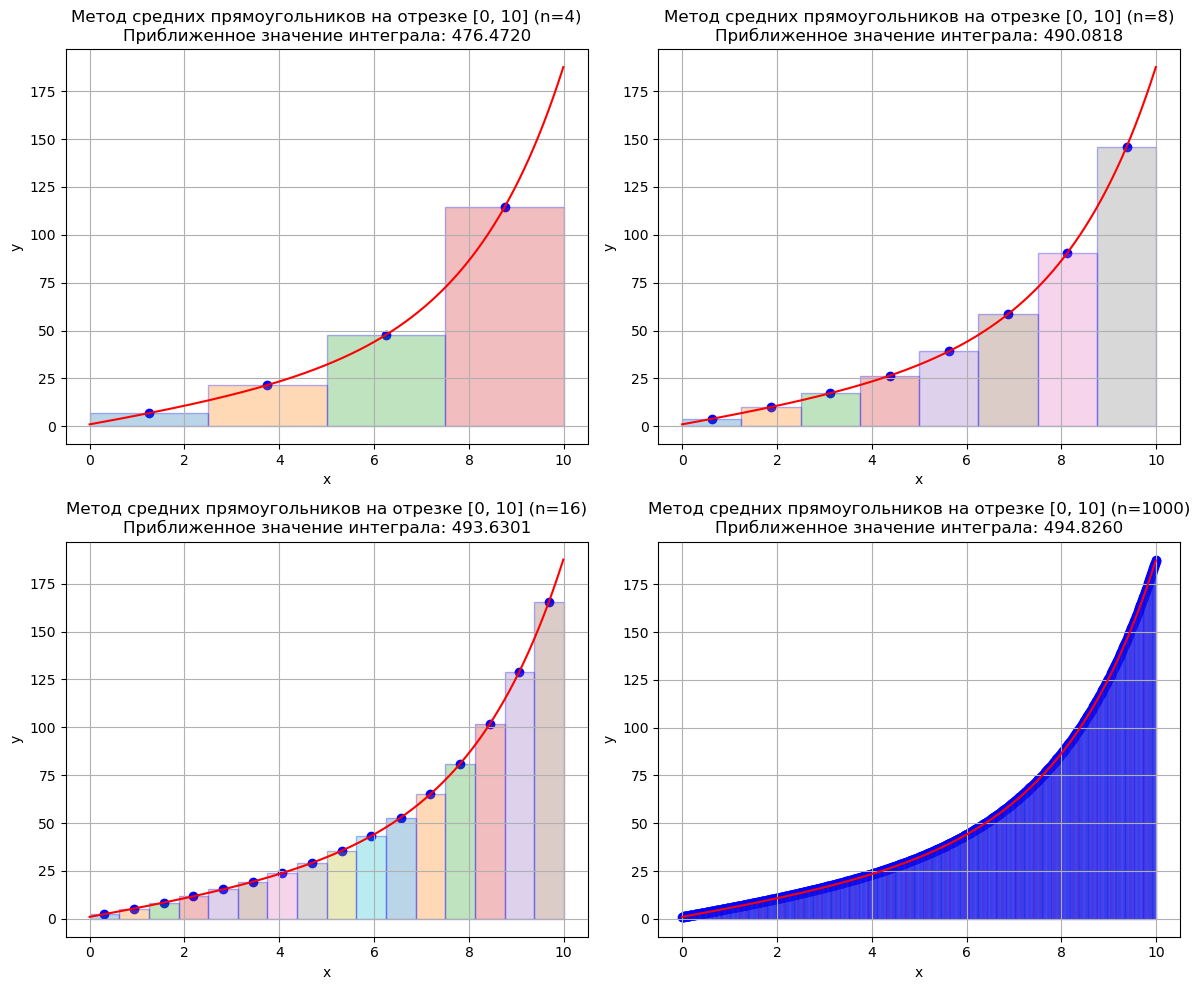

In [11]:
def integral_midpoint_rectangle(f, a, b, n_list, plot=False, **kwargs):
    """
    Метод средних прямоугольников
    :param f: Функция
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n_list: Список размеров разбиений
    :param plot: Флаг для построения графика
    :param kwargs: Дополнительные параметры для разбиения
    :return: Список приближённых значений интеграла для каждого n
    """
    result = []
    if plot:
        plt.figure(figsize=(12, 10))

    for n in n_list:
        x = get_partition(a, b, n, **kwargs)
        if plot:
            x_plot = []
        integral = 0
        for i in range(n):
            integral += f((x[i] + x[i + 1]) / 2) * (x[i + 1] - x[i])
            if plot:
                x_plot.append((x[i] + x[i + 1]) / 2)
        result.append(integral)

        if plot:
            x_plot.sort()
            plt.subplot(2, 2, n_list.index(n) + 1)
            plt.plot(np.arange(a, b, 0.01), f(np.arange(a, b, 0.01)), 'r-')
            plt.scatter(x_plot, f(np.array(x_plot)), color='b')
            for i in range(n):
                x_left = x[i]
                x_right = x[i + 1]
                y_val = f((x_left + x_right) / 2)
                X_rect = [x_left, x_right, x_right, x_left, x_left]
                Y_rect = [0, 0, y_val, y_val, 0]
                plt.fill(X_rect, Y_rect, alpha=0.3, edgecolor='b')
            plt.title(f"Метод средних прямоугольников на отрезке [{a}, {b}] (n={n})\n"
                      f"Приближенное значение интеграла: {integral:.4f}")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.grid()

    if plot:
        plt.tight_layout()
        plt.show()
    return result


result_mid_test = integral_midpoint_rectangle(f, a_test, b_test, n_list, plot=True)

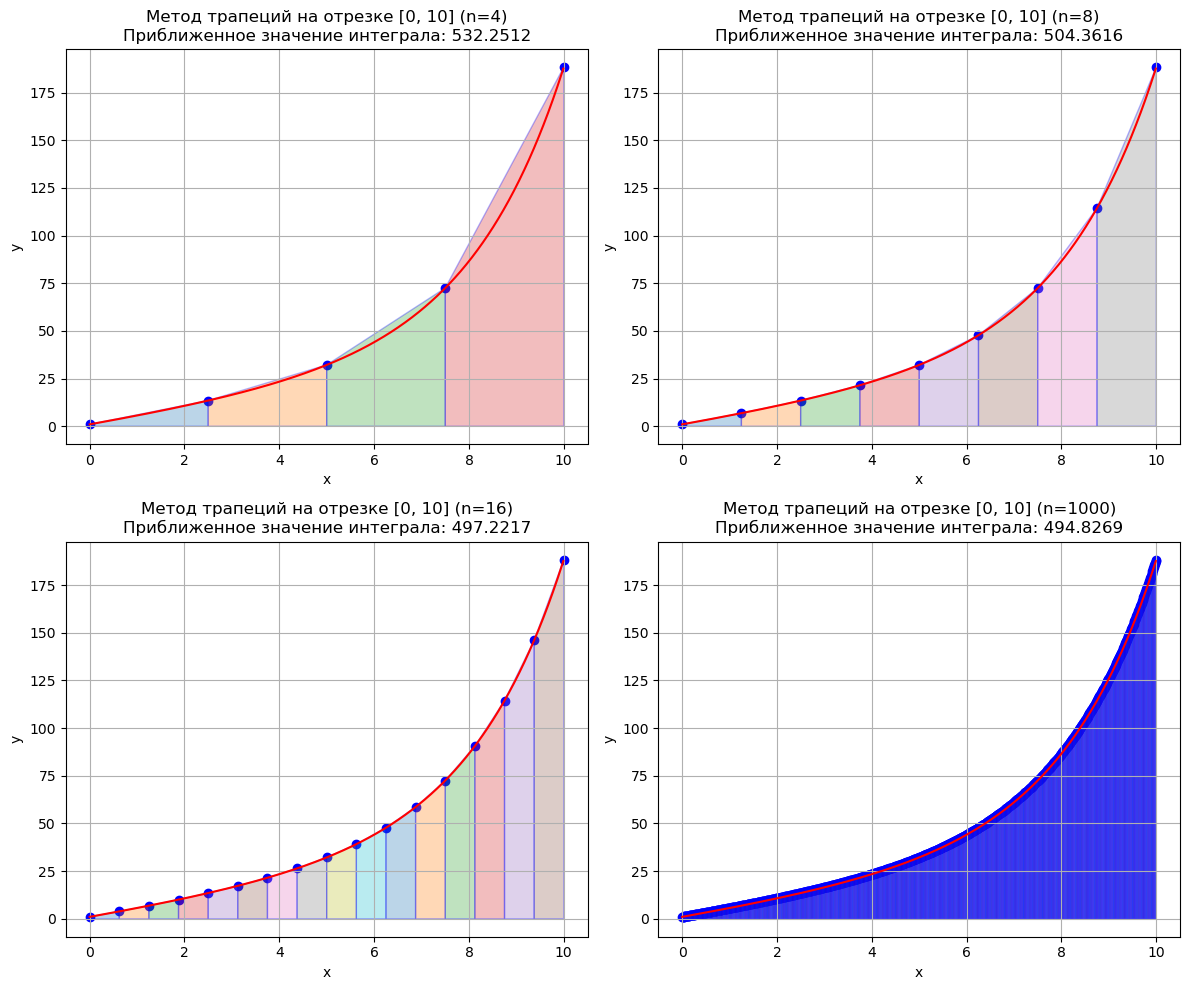

In [12]:
def integral_trapezoid(f, a, b, n_list, plot=False, **kwargs):
    """
    Метод трапеций
    :param f: Функция
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n_list: Список размеров разбиений
    :param plot: Флаг для построения графика
    :param kwargs: Дополнительные параметры для разбиения
    :return: Список приближённых значений интеграла для каждого n
    """
    result = []
    if plot:
        plt.figure(figsize=(12, 10))

    for n in n_list:
        x = get_partition(a, b, n, **kwargs)
        integral = 0
        for i in range(n):
            integral += (f(x[i]) + f(x[i + 1])) * (x[i + 1] - x[i]) / 2
        result.append(integral)

        if plot:
            plt.subplot(2, 2, n_list.index(n) + 1)
            plt.plot(np.arange(a, b, 0.01), f(np.arange(a, b, 0.01)), 'r-')
            plt.scatter(x, f(x), color='b')
            for i in range(n):
                x_left = x[i]
                x_right = x[i + 1]
                y_val_left = f(x_left)
                y_val_right = f(x_right)
                X_rect = [x_left, x_right, x_right, x_left, x_left]
                Y_rect = [0, 0, y_val_right, y_val_left, 0]
                plt.fill(X_rect, Y_rect, alpha=0.3, edgecolor='b')
            plt.title(f"Метод трапеций на отрезке [{a}, {b}] (n={n})\n"
                      f"Приближенное значение интеграла: {integral:.4f}")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.grid()

    if plot:
        plt.tight_layout()
        plt.show()
    return result


result_trap_test = integral_trapezoid(f, a_test, b_test, n_list, plot=True)

Для метода Сипсона приведена функция $$y = \sin(x),$$ так как она более наглядно показывает разницу между методами. Также приведены графики для всех разбиений.

Значение y = sin(x) на отрезке [-10, 5] = -1.1227337145396787
Случайное разбиение


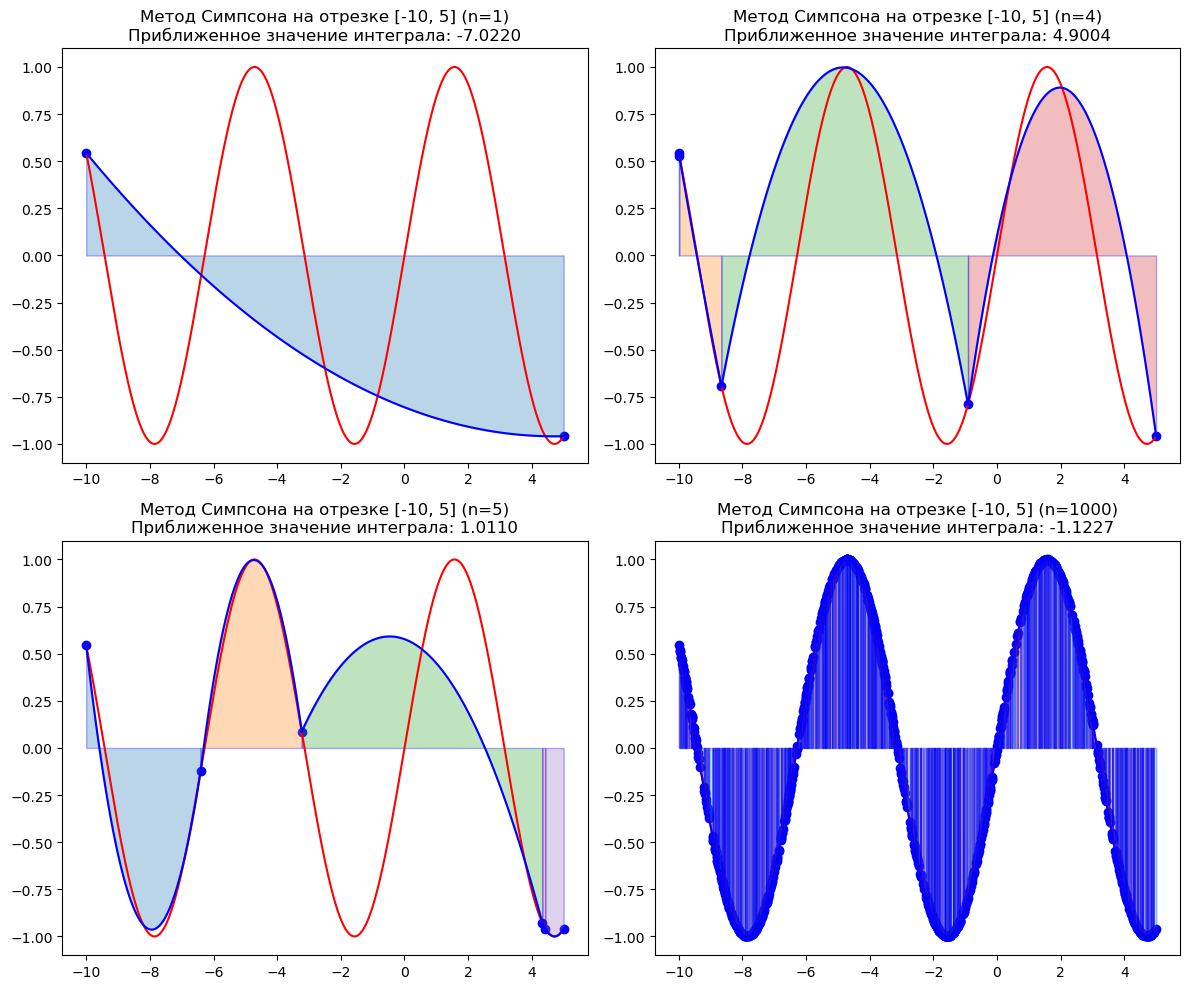

Равномерное разбиение


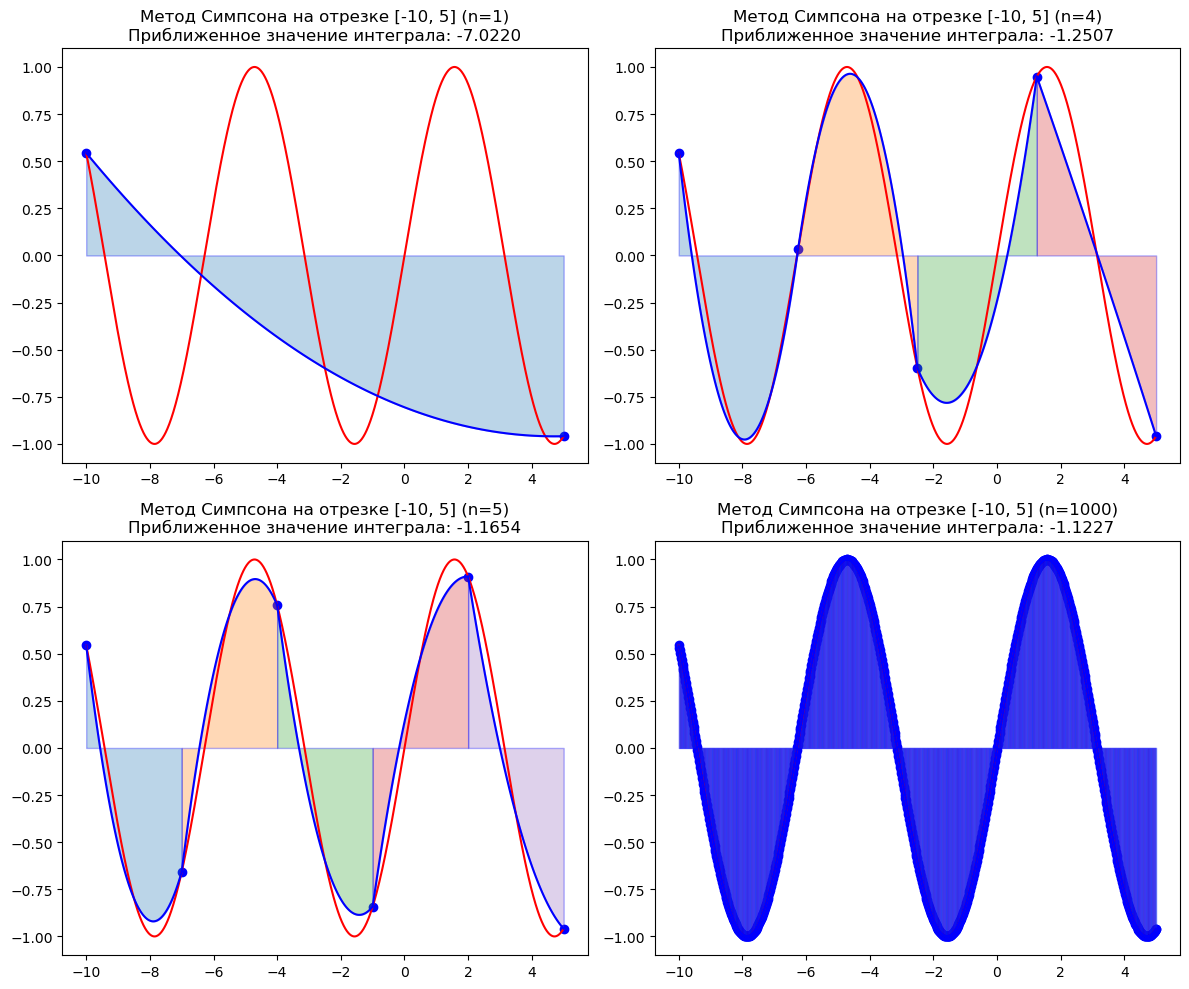

Степенное разбиение


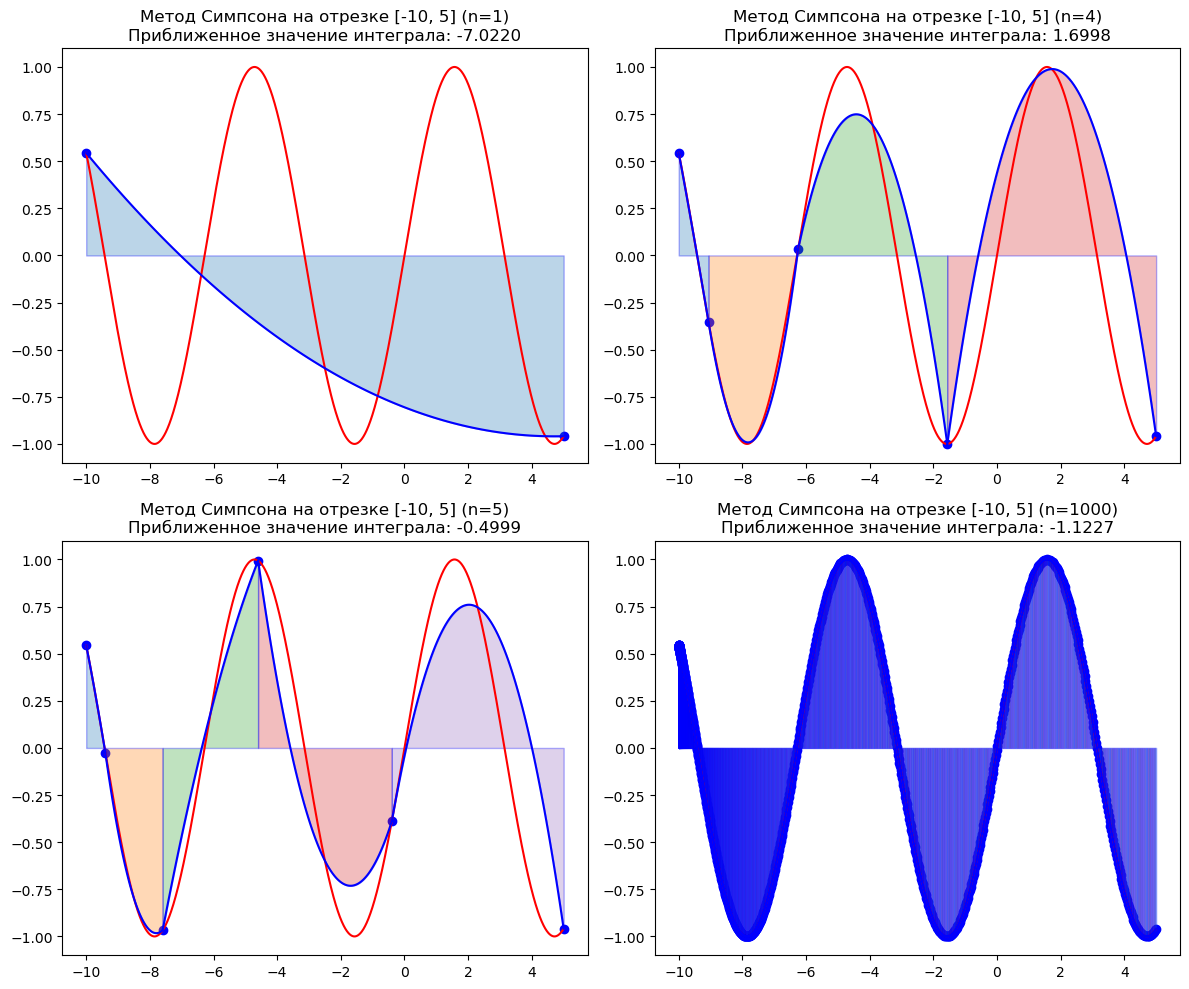

Изначальная функция


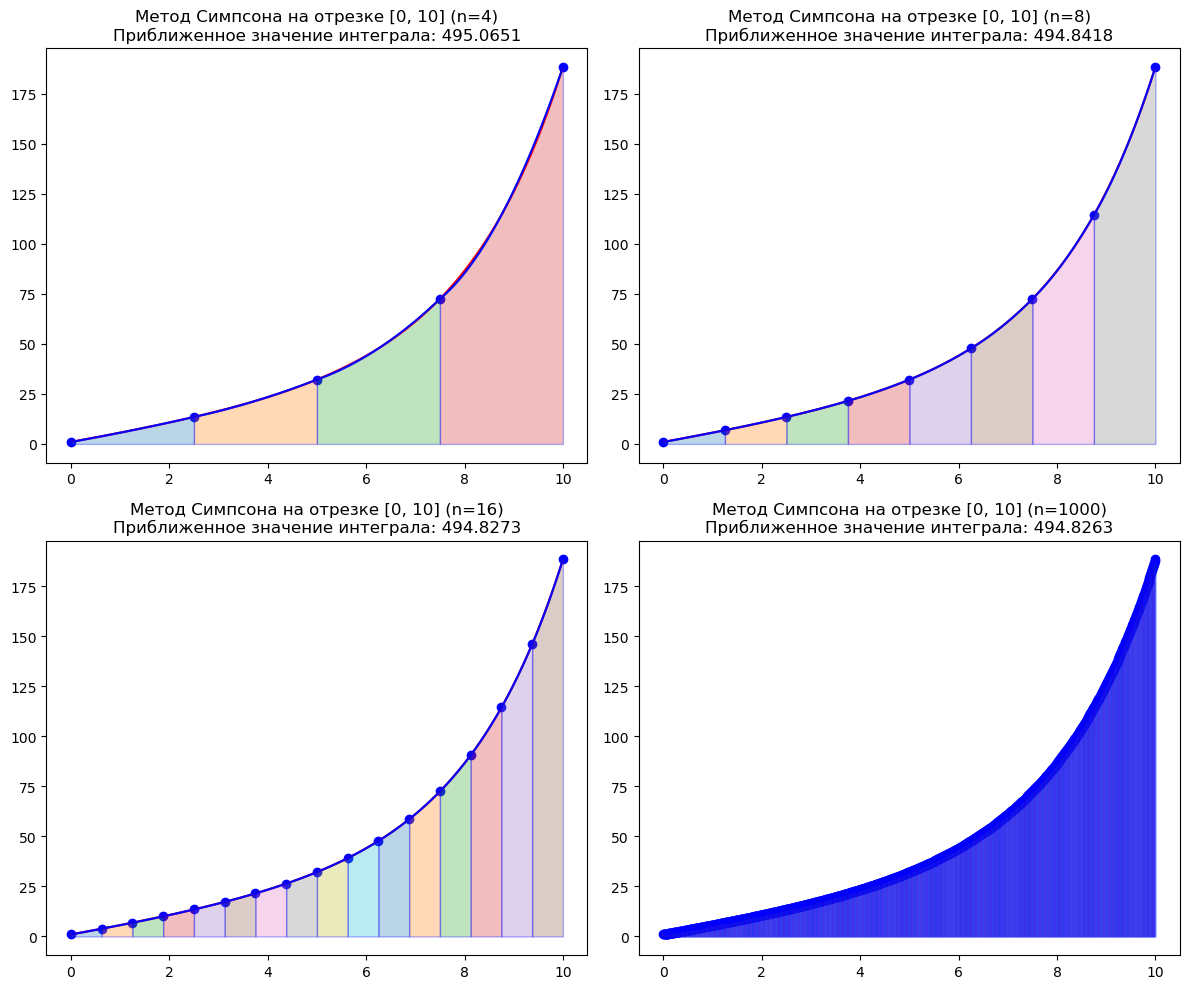

In [35]:
def quadratic_by_formulas(x1, y1, x2, y2, x3, y3):
    denominator = (x3 - x1) * (x2 - x1) * (x3 - x2)
    a = ((y3 - y1) * (x2 - x1) - (y2 - y1) * (x3 - x1)) / denominator
    b = (y2 - y1) / (x2 - x1) - a * (x2 + x1)
    c = y1 - a * x1 ** 2 - b * x1
    return lambda x: a * x ** 2 + b * x + c


def integral_simpson(f, a, b, n_list, plot=False, **kwargs):
    """
    Метод Симпсона
    :param f: Функция
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n_list: Список размеров разбиений (количество точек)
    :param plot: Флаг для построения графика
    :param kwargs: Дополнительные параметры для разбиения
    :return: Список приближённых значений интеграла для каждого n
    """
    result = []
    if plot:
        plt.figure(figsize=(12, 10))

    for n in n_list:
        x = get_partition(a, b, n, **kwargs)
        integral = 0
        for i in range(0, n):
            integral += (f(x[i]) + 4 * f((x[i + 1] + x[i]) / 2) + f(x[i + 1])) * (x[i + 1] - x[i]) / 6
        result.append(integral)

        if plot:
            plt.subplot(2, 2, n_list.index(n) + 1)
            plt.plot(np.arange(a, b, 0.01), f(np.arange(a, b, 0.01)), 'r-')
            plt.scatter(x, f(x), color='b')
            for i in range(0, n):
                x_left = x[i]
                x_right = x[i + 1]
                y_val_left = f(x_left)
                y_val_right = f(x_right)
                mid = (x_left + x_right) / 2
                y_val_mid = f(mid)
                q_b_f = quadratic_by_formulas(x_left, y_val_left, mid, y_val_mid, x_right, y_val_right)
                x_plot = np.linspace(x_left, x_right, 100)
                y_plot = q_b_f(x_plot)
                plt.plot(x_plot, y_plot, 'b-')
                plt.fill_between(x_plot, y_plot, alpha=0.3, edgecolor='b')
            plt.title(f"Метод Симпсона на отрезке [{a}, {b}] (n={n})\n"
                      f"Приближенное значение интеграла: {integral:.4f}")

    if plot:
        plt.tight_layout()
        plt.show()
    return result


print(f"Значение y = sin(x) на отрезке [-10, 5] = {-np.cos(5) + np.cos(-10)}")
print("Случайное разбиение")
result = integral_simpson(lambda x: np.sin(x), -10, 5, [1, 4, 5, 1000], plot=True, type='random')
print("Равномерное разбиение")
result = integral_simpson(lambda x: np.sin(x), -10, 5, [1, 4, 5, 1000], plot=True, type='uniform')
print("Степенное разбиение")
result = integral_simpson(lambda x: np.sin(x), -10, 5, [1, 4, 5, 1000], plot=True, type='power', alpha=2)
print("Изначальная функция")
result_simp_test = integral_simpson(f, a_test, b_test, n_list, plot=True)

Генерация отчета по всем методам интегрирования и разбиениям.

In [49]:
import pandas as pd


def calculate_errors(true_value, results):
    """
    Функция для вычисления ошибок
    :param true_value: Истинное значение интеграла
    :param results: Массив результатов метода
    :return: Массив ошибок
    """
    errors = []
    for result in results:
        errors.append(abs(result - true_value))
    return errors


def generate_report(f, a, b, n_list, true_value,
                    partition_methods={'uniform': {}, 'power': {}, 'log': {}, 'exp': {}, 'sine': {}, 'random': {}},
                    integration_methods=[integral_left_rectangle,
                                         integral_right_rectangle,
                                         integral_midpoint_rectangle,
                                         integral_trapezoid,
                                         integral_simpson]):
    """
    Генерация отчета по методам интегрирования
    :param f: Функция
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n_list: Список размеров разбиений
    :param true_value: Истинное значение интеграла
    :param partition_methods: Словарь методов разбиения (key = имя метода, value = kwargs)
    :param integration_methods: Массив методов интегрирования
    :return: None
    """
    print("Верное значение интеграла:", true_value)
    results = {}
    errors = {}
    for partition_method_name, kwargs in partition_methods.items():
        results[partition_method_name] = {}
        errors[partition_method_name] = {}
        for integration_method in integration_methods:
            results[partition_method_name][integration_method.__name__] = []
            errors[partition_method_name][integration_method.__name__] = []
            for n in n_list:
                result = integration_method(f, a, b, [n], plot=False, **kwargs)[0]
                results[partition_method_name][integration_method.__name__].append(result)
                error = abs(result - true_value)
                errors[partition_method_name][integration_method.__name__].append(error)

    for partition_method_name in partition_methods:
        df_results = pd.DataFrame(results[partition_method_name])
        df_results.index = n_list
        df_results.index.name = 'n'
        print(f"Результаты для метода разбиения {partition_method_name}:")
        display(df_results)

        df_errors = pd.DataFrame(errors[partition_method_name])
        df_errors.index = n_list
        df_errors.index.name = 'n'
        print(f"Ошибки для метода разбиения {partition_method_name}:")
        display(df_errors)


generate_report(f, a_test, b_test, [1, 2, 4, 8, 16, 32, 64, 128], true_value_0_10, partition_methods={'sine': {}})

Верное значение интеграла: 494.8263182051532
Результаты для метода разбиения sine:


,integral_left_rectangle,integral_right_rectangle,integral_midpoint_rectangle,integral_trapezoid,integral_simpson
n,,,,,
1,10.000000,1884.131591,321.824940,947.065796,530.238558
2,165.912470,1102.978265,430.057125,634.445368,498.186539
4,297.984797,766.517695,476.471999,532.251246,495.065082
8,387.228398,621.494847,490.081827,504.361623,494.841759
16,438.655113,555.788337,493.630075,497.221725,494.827292
32,466.142594,524.709206,494.526619,495.425900,494.826379
64,480.334606,509.617912,494.751353,494.976259,494.826322
128,487.542980,502.184633,494.807574,494.863806,494.826318


Ошибки для метода разбиения sine:


,integral_left_rectangle,integral_right_rectangle,integral_midpoint_rectangle,integral_trapezoid,integral_simpson
n,,,,,
1,484.826318,1389.305273,173.001379,452.239477,3.541224e+01
2,328.913848,608.151947,64.769193,139.619049,3.360221e+00
4,196.841521,271.691377,18.354319,37.424928,2.387634e-01
8,107.597920,126.668529,4.744491,9.535305,1.544070e-02
16,56.171206,60.962019,1.196243,2.395407,9.734485e-04
32,28.683724,29.882888,0.299699,0.599582,6.097312e-05
64,14.491712,14.791594,0.074965,0.149941,3.812896e-06
128,7.283338,7.358315,0.018744,0.037488,2.383385e-07
